In [2]:
# from google.colab import files
# files.upload()
# !pip install -q kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !ls ~/.kaggle
# !chmod 600 /root/.kaggle/kaggle.json
# !kaggle competitions download -c digit-recognizer
# !unzip -q train.csv.zip -d .
# !unzip -q test.csv.zip -d .

Saving kaggle.json to kaggle.json
kaggle.json
  0% 0.00/6.09M [00:00<?, ?B/s]
100% 6.09M/6.09M [00:00<00:00, 100MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 77.1MB/s]
 55% 5.00M/9.16M [00:00<00:00, 48.7MB/s]
100% 9.16M/9.16M [00:00<00:00, 58.5MB/s]


In [25]:
# Import Data
import pandas as pd
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [26]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [27]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 

In [28]:
# Normalize the data
X_train = X_train.astype('float32')
X_test = test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [29]:
X_train = X_train.values.reshape(X_train.shape[0],28,28,1)

In [31]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [32]:
# Set the random seed
random_seed = 2

In [33]:
# Split the train and the validation set 
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

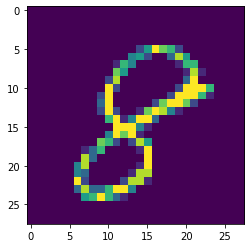

In [34]:
# Sample
g = plt.imshow(X_train[0][:,:,0])

In [13]:
# Data augmentation

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.1, 
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)  


datagen.fit(X_train)

In [14]:
# CNN model 

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [15]:
# Compile the model
model.compile(optimizer = 'Nadam', loss = "categorical_crossentropy", metrics=["accuracy"])

In [16]:
# learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


#Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=64),epochs = 10, validation_data = (X_val,Y_val),verbose = 1, steps_per_epoch=X_train.shape[0]//64 , callbacks=[learning_rate_reduction])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
590/590 [==============================] - 12s 20ms/step - loss: 0.3557 - accuracy: 0.8846 - val_loss: 0.0616 - val_accuracy: 0.9814
Epoch 2/10
590/590 [==============================] - 12s 20ms/step - loss: 0.1146 - accuracy: 0.9652 - val_loss: 0.0407 - val_accuracy: 0.9879
Epoch 3/10
590/590 [==============================] - 12s 20ms/step - loss: 0.0888 - accuracy: 0.9736 - val_loss: 0.0360 - val_accuracy: 0.9905
Epoch 4/10
590/590 [==============================] - 12s 20ms/step - loss: 0.0715 - accuracy: 0.9781 - val_loss: 0.0259 - val_accuracy: 0.9926
Epoch 5/10
590/590 [==============================] - 12s 20ms/step - loss: 0.0655 - accuracy: 0.9806 - val_loss: 0.0277 - val_accuracy: 0.9926
Epoch 6/10
590/590 [==============================] - 12s 20ms/step - loss: 0.0582 - accuracy: 0.9824 - val_loss: 0.0376 - val_accuracy: 0.9895
Epoch 7/10
590/590 [==============================] - ETA: 0

Performance and Predictions

[0.8845929503440857, 0.9651526212692261, 0.9736326336860657, 0.9780845642089844, 0.9805755615234375, 0.9824040532112122, 0.9829340577125549, 0.9882605671882629, 0.9884990453720093, 0.9889760613441467]


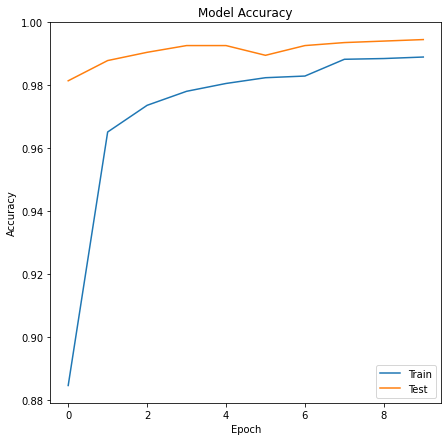

In [17]:
print(history.history['accuracy'])
plt.figure(figsize=(7,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

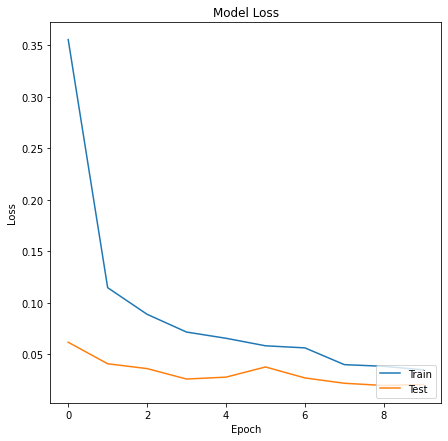

In [18]:
plt.figure(figsize=(7,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

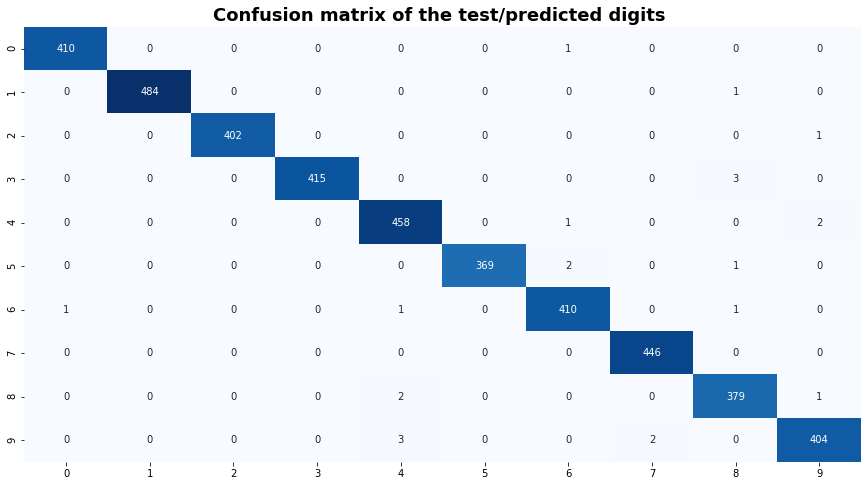

In [19]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
y_class = np.argmax(model.predict(X_val), axis = 1) 
y_check = np.argmax(Y_val, axis = 1) 
cmatrix = confusion_matrix(y_check, y_class)
plt.figure(figsize=(15,8))
plt.title('Confusion matrix of the test/predicted digits ', weight='bold', fontsize=18)
sns.heatmap(cmatrix,annot=True,cmap="Blues",fmt="d",cbar=False)

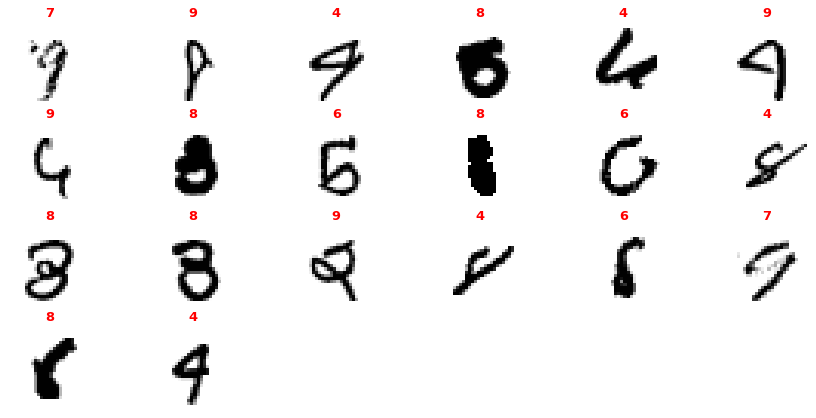

In [20]:
# Misclassified Images
predicted = model.predict(X_val)
class_y = np.argmax(Y_val,axis = 1) 
class_num=np.argmax(predicted, axis=1)
errors = (class_num - class_y != 0)
predicted_er = predicted[errors]
y_test_er = Y_val[errors]
x_test_er = X_val[errors]

                

plt.figure(figsize=(15,9))

for i in range(20):
    plt.subplot(5,6,i+1)
    plt.imshow(x_test_er[i].reshape((28,28)),cmap='binary')
    plt.title( np.argmax(predicted_er[i]), size=13, weight='bold', color='red')
    plt.axis("off")


plt.show()



In [35]:
X_test = X_test.values.reshape(X_test.shape[0],28,28,1)

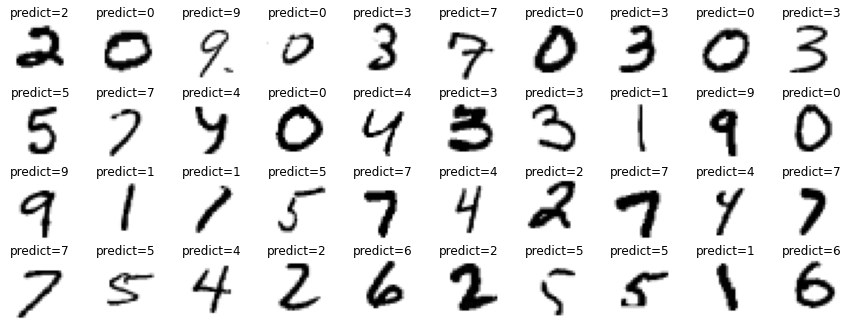

In [37]:
results = np.zeros( (X_test.shape[0],10) ) 
results = results + model.predict(X_test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

X_test1a = test / 255.0
X_test1a = X_test1a.values.reshape(-1,28,28,1)

plt.figure(figsize=(15,6))
for i in range(40):  
    plt.subplot(4, 10, i+1)
    plt.imshow(X_test1a[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.title("predict=%d" % results[i],y=0.9)
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=-0.1)
plt.show()